# Домашнее задание

В этом задании мы попрактикуемся в методах снижения размерности и кластеризации данных.

Мы будем работать с набором данных Samsung Human Activity Recognition. Скачайте данные по ссылке https://archive.ics.uci.edu/ml/machine-learning-databases/00240/. Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

In [ ]:
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook
import pandas as pd


%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

from google.colab import drive
drive.mount('/content/gdrive')

<ipython-input-2-58cfea0aa87a>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-darkgrid'])


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
X_train = np.loadtxt("/content/gdrive/My Drive/data_stud/machlearn/X_train.txt")
y_train = np.loadtxt("/content/gdrive/My Drive/data_stud/machlearn/y_train.txt").astype(int)

X_test = np.loadtxt("/content/gdrive/My Drive/data_stud/machlearn/X_test.txt")
y_test = np.loadtxt("/content/gdrive/My Drive/data_stud/machlearn/y_test.txt").astype(int)

Для кластеризации нам не нужен вектор ответов. Объедините обучающую и тестовую выборки.

In [ ]:
#your code here
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

In [ ]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

Отмасштабируйте выборку с помощью StandardScaler.

In [ ]:
#your code here
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

In [ ]:
#your code here
pca = PCA(0.9)
X_pca = pca.fit_transform(X_scaled)

Визуализируйте данные в проекции на первые две главные компоненты.

Text(0, 0.5, 'y')

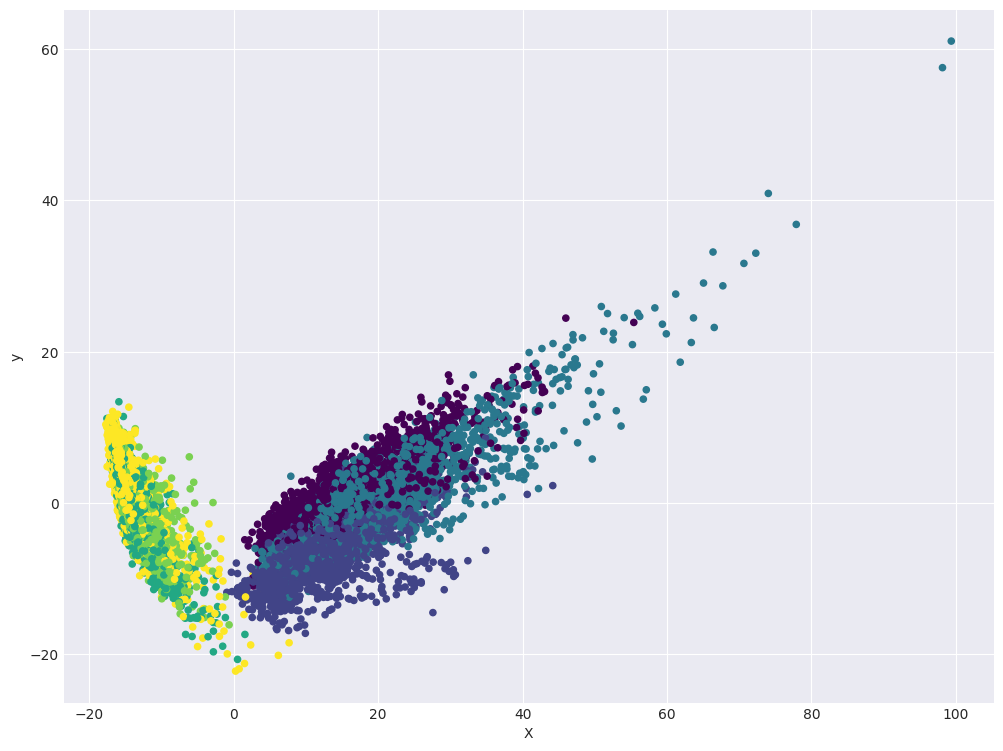

In [ ]:
#your code here
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=20, cmap='viridis');

plt.xlabel('X')
plt.ylabel('y')

Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов).

Параметры:

n_clusters = n_classes (число уникальных меток целевого класса)

n_init = 100

random_state = RANDOM_STATE (для воспроизводимости результата)

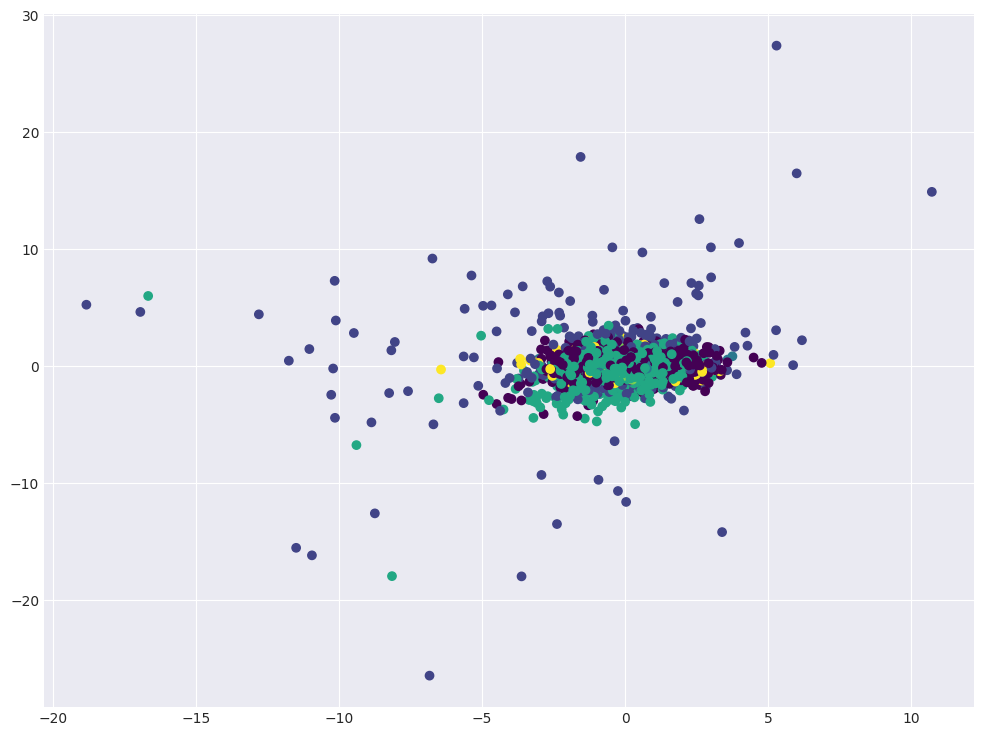

In [ ]:
pca = PCA(0.9)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=RANDOM_STATE, n_init=100)
y_pred = kmeans.fit_predict(X_scaled)


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis')

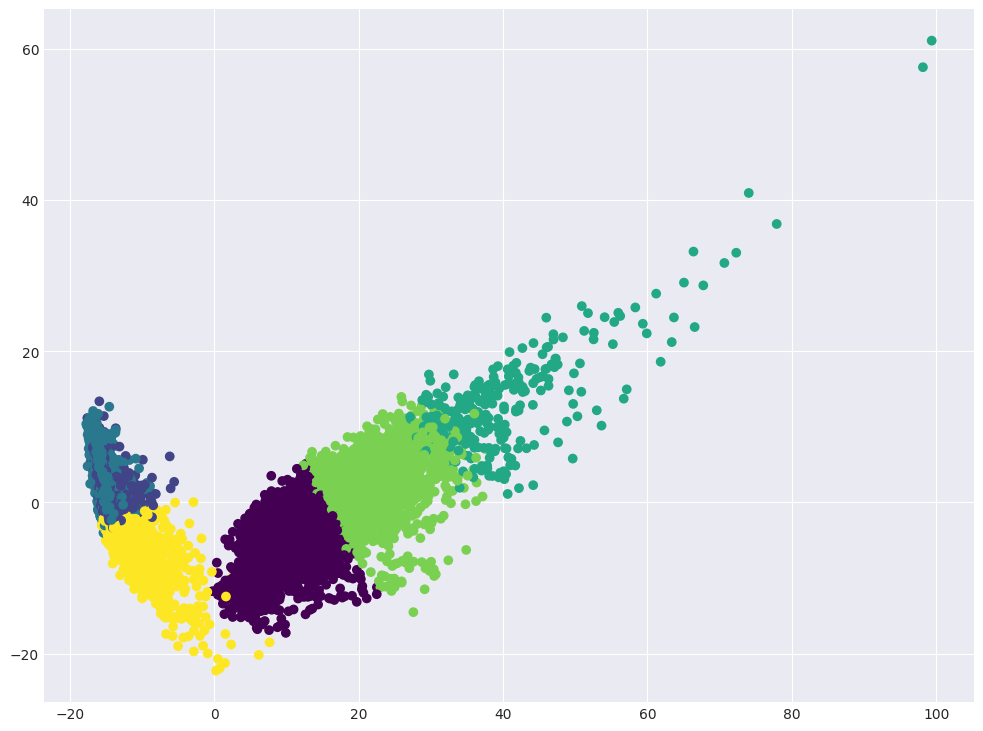

In [ ]:
kmeans_pca = KMeans(n_clusters=len(np.unique(y)), random_state=RANDOM_STATE, n_init=100)
y_pca = kmeans_pca.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pca, cmap='viridis')

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

Text(0, 0.5, 'y')

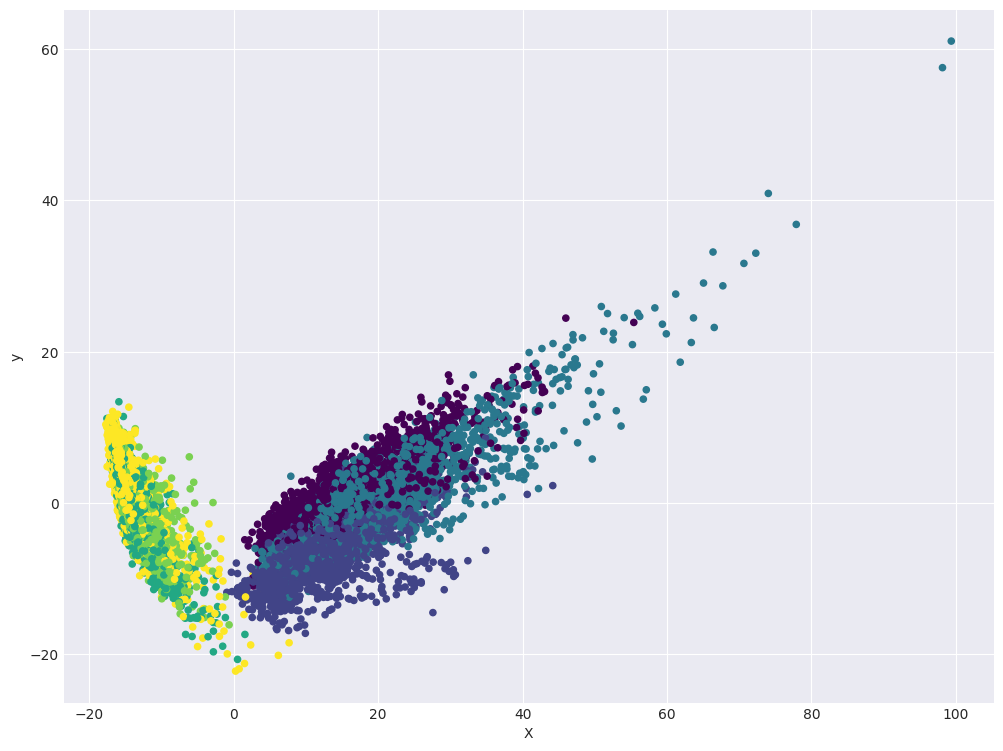

In [ ]:
#your code here
pca2 = PCA(n_components=2)
X_pca2 = pca.fit_transform(X_scaled)
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, s=20, cmap='viridis');

plt.xlabel('X')
plt.ylabel('y')

Выведите на экран значения метрик качества кластеризации

In [ ]:
labels = y

print("Homogenity: %0.3f" % metrics.homogeneity_score(labels, X_kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, X_kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, X_kmeans.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, X_kmeans.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(labels, X_kmeans.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, X_kmeans.labels_, sample_size=1000))

Homogenity: 0.452
Completeness: 0.467
V-measure: 0.459
Adjusted Rand-Index: 0.299
Adjusted mutual info score: 0.459
Silhouette Coefficient: 0.433


Теперь попробуем сделать кластеризацию с помощью AgglomerativeClustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [ ]:
ag = AgglomerativeClustering(n_clusters=len(np.unique(y)),
                             linkage='ward').fit(X_pca)

Выведите метрики качества для полученного разбиения на кластеры. Сравните с kmeans. Запишите выводы!

In [ ]:
labels = y

print("Homogenity: %0.3f" % metrics.homogeneity_score(labels, ag.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, ag.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, ag.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, ag.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(labels, ag.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, ag.labels_, sample_size=1000))

Homogenity: 0.446
Completeness: 0.497
V-measure: 0.470
Adjusted Rand-Index: 0.313
Adjusted mutual info score: 0.470
Silhouette Coefficient: 0.448


In [ ]:
#получается, что метрики у agglomerativeClustering лучше

Попробуйте применить другие методы кластеризации из sklearn. Также вычислите метрики качества и сделайте вывод о том, какой метод сработал лучше.

In [ ]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=len(np.unique(y)))

y3 = sc.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
labels = y3

print("Homogenity: %0.3f" % metrics.homogeneity_score(labels, fa.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, fa.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, fa.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, fa.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(labels, fa.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, fa.labels_, sample_size=1000))

ValueError: labels_true must be 1D: shape is ()

Для самой успешной из полученных кластеризаций попробуйте дать интерпретацию кластеров. Опишите характеристики объектов, попавших в каждый кластер. Для этого можете ответить на следующие вопросы:

* похожи ли объекты внутри каждого кластера на определенный тип активности человека?
* в каких кластерах смешано несколько типов активности? С чем, на ваш взгляд, это может быть связано?
* качественная ли получилась кластеризация? На основании чего вы можете сделать такой вывод?

In [ ]:
# your text here